# Best Pittsburgh Neighboorhood

## Team Stuff

#### Introduction:

Datasets used:
- [Arrests.csv](https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f)
- [Educational-Attainment.csv](https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2015-miscellaneous-data/resource/12535b2e-6180-4cdf-b7d8-ec5294259e49)
- [GunSeizures.csv](https://data.wprdc.org/dataset/pbp-fire-arm-seizures)
- [CensusData.csv](https://data.wprdc.org/dataset/pgh/resource/b7156251-6036-4b68-ad2a-95566c84343e)

## Educational Attainment

The level of educational attainment data is from the 2015 American Community Survey (ACS). Suvery responders answered with their highest level of educational qualification, ranging from "no schooling completed" to "doctorate degree". I weighted each category incrementally by one (starting from 0 for "no schooling completed"). Then, I found the average educational attainment per person by dividing the weighted average by the total population of each neighborhood.

In [5]:
import pandas

pandas.set_option('display.max_rows', None)

ed_data = pandas.read_csv("educational-attainment.csv")
ed_list = []

# List of neighborhoods
neighborhoods = []
for i in range(len(ed_data)):
    neighborhoods.append(ed_data.iloc[i, 1])

# List of weights for average
w = []
for i in range(24):
    w.append(i)

# Calculating weighted average
for i in range(len(ed_data)):
    avg = (w[1]*ed_data.iloc[i, 5] + w[2]*ed_data.iloc[i, 7] + w[3]*ed_data.iloc[i, 9] + w[4]*ed_data.iloc[i, 11] + 
           w[5]*ed_data.iloc[i, 13] + w[6]*ed_data.iloc[i, 15] + w[7]*ed_data.iloc[i, 17] + w[8]*ed_data.iloc[i, 19] + 
            w[9]*ed_data.iloc[i, 21] + w[10]*ed_data.iloc[i, 23] + w[11]*ed_data.iloc[i, 25] + w[12]*ed_data.iloc[i, 27] +
            w[13]*ed_data.iloc[i, 29] + w[14]*ed_data.iloc[i, 31] + w[15]*ed_data.iloc[i, 33] + w[16]*(ed_data.iloc[i, 35] + ed_data.iloc[i, 37]) +
            w[17]*ed_data.iloc[i, 39] + w[18]*ed_data.iloc[i, 41] + w[19]*ed_data.iloc[i, 43] + w[20]*ed_data.iloc[i, 45] +
            w[21]*ed_data.iloc[i, 47] + w[22]*ed_data.iloc[i, 49] + w[23]*ed_data.iloc[i, 51]
            ) / ed_data.iloc[i, 3]
        
    ed_list.append(avg)

ed_df = pandas.DataFrame({"Neighborhoods": neighborhoods, "Average Educational Attainment": ed_list}).drop(52).sort_values("Average Educational Attainment", ascending = False)
ed_df

,Neighborhoods,Average Educational Attainment
76,Squirrel Hill North,20.404999
66,Regent Square,20.335840
80,Strip District,20.290936
63,Point Breeze,20.219334
57,North Shore,20.116959
68,Shadyside,20.007217
71,South Shore,20.000000
33,Friendship,19.765341
77,Squirrel Hill South,19.741746
64,Point Breeze North,19.738112


<Axes: xlabel='Neighborhoods'>

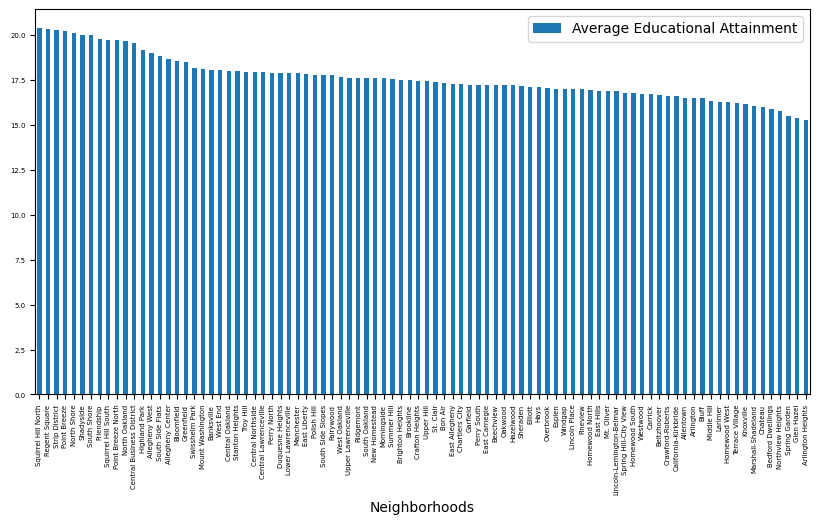

In [6]:
ed_df.plot.bar(x = "Neighborhoods", y = "Average Educational Attainment", fontsize = 5, figsize = [10, 5])

The neighborhood with the highest educational attainment is Squirrel Hill North, which makes sense considering that's where CMU's campus is located.

## Arrests

The data for arrests seems to have been recorded form 1998 to 2023. There may be some innacuracies becuase in 25 years a neighborhood could have changed from dangerous to safe but still have statistics that show it as dangerous. For this data set I counted up all the arrests in each individual neighborhood. I then found the population of each neighborhood and took the arrests / neighborhood * 1000 to find the number of arrests in each neighborhood per 1000 people. Then I printed the information in a table, in order from lowest arrests per 1000 people.

In [1]:
import pandas as pd

# Display all rows
pd.set_option('display.max_rows', None)

# Load arrests data
Arrests = pd.read_csv("Arrests.csv")
Arrests['INCIDENTNEIGHBORHOOD'] = Arrests['INCIDENTNEIGHBORHOOD'].replace("Central North Side", "Central Northside")
Arrests['INCIDENTNEIGHBORHOOD'] = Arrests['INCIDENTNEIGHBORHOOD'].replace("Troy Hill-Herrs Island", "Troy Hill")
Arrests['INCIDENTNEIGHBORHOOD'] = Arrests['INCIDENTNEIGHBORHOOD'].replace("Mt. Oliver Boro", "Mt. Oliver")
Arrests['INCIDENTNEIGHBORHOOD'] = Arrests['INCIDENTNEIGHBORHOOD'].replace("Mount Oliver", "Mt. Oliver")
Arrests['INCIDENTNEIGHBORHOOD'] = Arrests['INCIDENTNEIGHBORHOOD'].replace("Mt. Oliver Neighborhood", "Mt. Oliver")

# Count arrests per neighborhood
arrests_per_neighborhood = Arrests['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
arrests_per_neighborhood.columns = ['Neighborhood', 'Number of Arrests']

# Load the population data
population_data = pd.read_csv("CensusData.csv")

# Merge arrests and population data on 'Neighborhood'
merged_data = pd.merge(arrests_per_neighborhood, population_data, on='Neighborhood', how='inner')

# Calculate arrest per 1,000 people
merged_data['Arrests per 1,000 People'] = (merged_data['Number of Arrests'] / merged_data['Population (2010)']) * 1000

# Exclude specific non-neighborhood entries
excluded_neighborhoods = [
    "Outside State", "Outside City", "Outside County", "Golden Triangle/Civic Arena"
]

# Create data frame
filtered_data = merged_data[~merged_data['Neighborhood'].isin(excluded_neighborhoods)].sort_values(
    by='Arrests per 1,000 People').reset_index(drop=True)

filtered_data[['Neighborhood', 'Number of Arrests', 'Population (2010)', 'Arrests per 1,000 People']]

,Neighborhood,Number of Arrests,Population (2010),"Arrests per 1,000 People"
0,Squirrel Hill North,290,11363,25.521429
1,Swisshelm Park,43,1361,31.594416
2,New Homestead,39,990,39.393939
3,Regent Square,37,928,39.870690
4,North Oakland,455,10551,43.123875
5,Stanton Heights,223,4601,48.467724
6,Squirrel Hill South,812,15110,53.739246
7,Morningside,188,3346,56.186491
8,Point Breeze,301,5315,56.632173
9,Shadyside,971,13915,69.780812


## Firearm Seizures

The data for firearm seizures seems to have been recorded from 2015 to 2022, as such, there may be some innacuracies raised due to a certain event that occured during that timespan, but it should be fine. After reading in the data for firearm seizures, we need sum up the total number of firearms that have been confiscated in each neighborhood. This is easily done by iterating through the list and using dictionaries. After that, we add the dictionary to a new dataframe, with both the keys and the values being columns. After this, we get rid of the significant number of data points without a neighbourhood(1004) as those data points have no locational information to deduce where the firearms were confiscated. Then, we sort the list in ascending order, as the fewer the confiscations the better. 

In [23]:
import pandas as pd
import math as math #Setup

pd.set_option('display.max_rows', None) #Makes it so that the entire dataframe gets displayed
Gun = pd.read_csv("GunSeizures.csv") 
Gun['neighborhood'] = Gun['neighborhood'].replace("Mount Oliver Borough", "Mt. Oliver")#Fixing errors in the data

Neighborhoods = {}
for i in Gun['neighborhood']:
    Neighborhoods[i] = 0
for (i, f) in zip(Gun['neighborhood'], Gun['total_count']):# Sums up the total number of firearms confiscated per neighborhood
    Neighborhoods[i] += f

data = pd.DataFrame()
neighborhood = list(Neighborhoods.keys())
numguns = list(Neighborhoods.values())
data['neighborhood'] = neighborhood
data['number confiscated'] = numguns



data = data.dropna(inplace = False)#Gets rid of the entries with no neighborhood listed

data.sort_values(by='number confiscated', ascending=True, inplace= True)#Sorts the list
data


,neighborhood,number confiscated
87,Swisshelm Park,3
64,Summer Hill,3
79,Oakwood,4
76,Regent Square,4
30,Chartiers City,4
46,Friendship,5
84,West End,6
77,St. Clair,7
86,Hays,8
57,Fairywood,9


Next, we graph the data using a bar graph. 

<Axes: title={'center': 'Gun Confiscations by Pittsburgh Neighborhood'}, xlabel='neighborhood'>

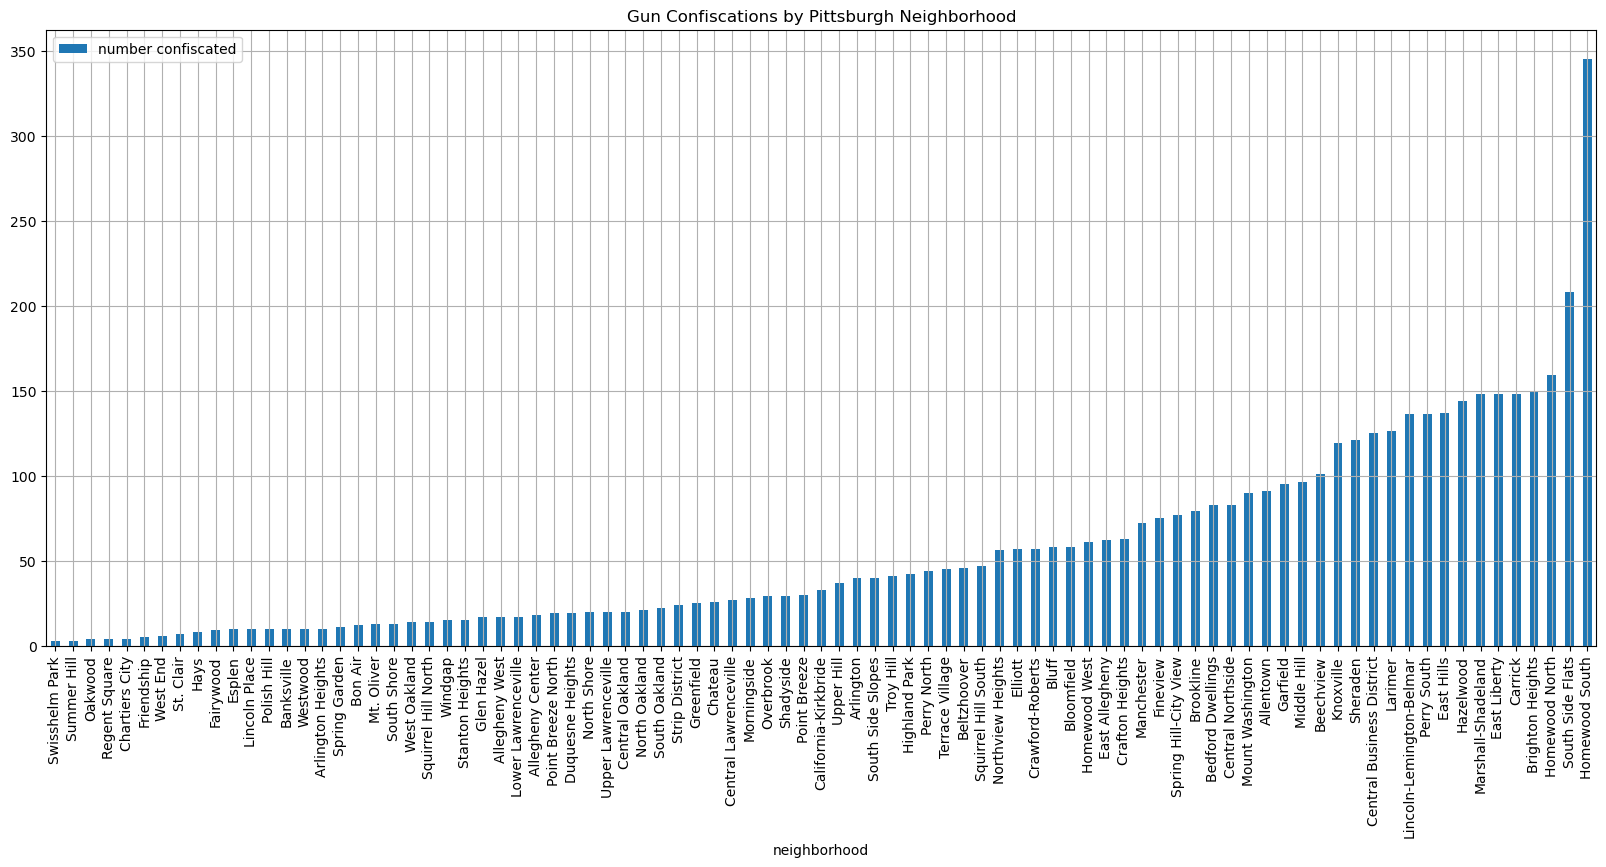

In [24]:
data.plot(x = 'neighborhood', y = 'number confiscated', kind = "bar",fontsize = 10, figsize = [20, 8], title = 'Gun Confiscations by Pittsburgh Neighborhood', grid = True)

As we can see, the worst offenders here are Homewood South by a far margin, followed by South Side Flats and Homewood North. South Side Flats doesn't surprise me, as the one time I went there I noticed the sheer number of bars and nightclubs. I've never been to the other two though so I can't say much there. As for the "best" neighborhoods, we have the top 5 as East Carnegie, Ridgemont, Swisshelm Park, Summer Hill, and Mt. Oliver. 

However, 90 neighborhoods is a tad bit too much to graph, so let's narrow it down to the top 10

In [25]:
data.head(10)

,neighborhood,number confiscated
87,Swisshelm Park,3
64,Summer Hill,3
79,Oakwood,4
76,Regent Square,4
30,Chartiers City,4
46,Friendship,5
84,West End,6
77,St. Clair,7
86,Hays,8
57,Fairywood,9


<Axes: title={'center': 'Gun Confiscations by Pittsburgh Neighborhood'}, xlabel='neighborhood'>

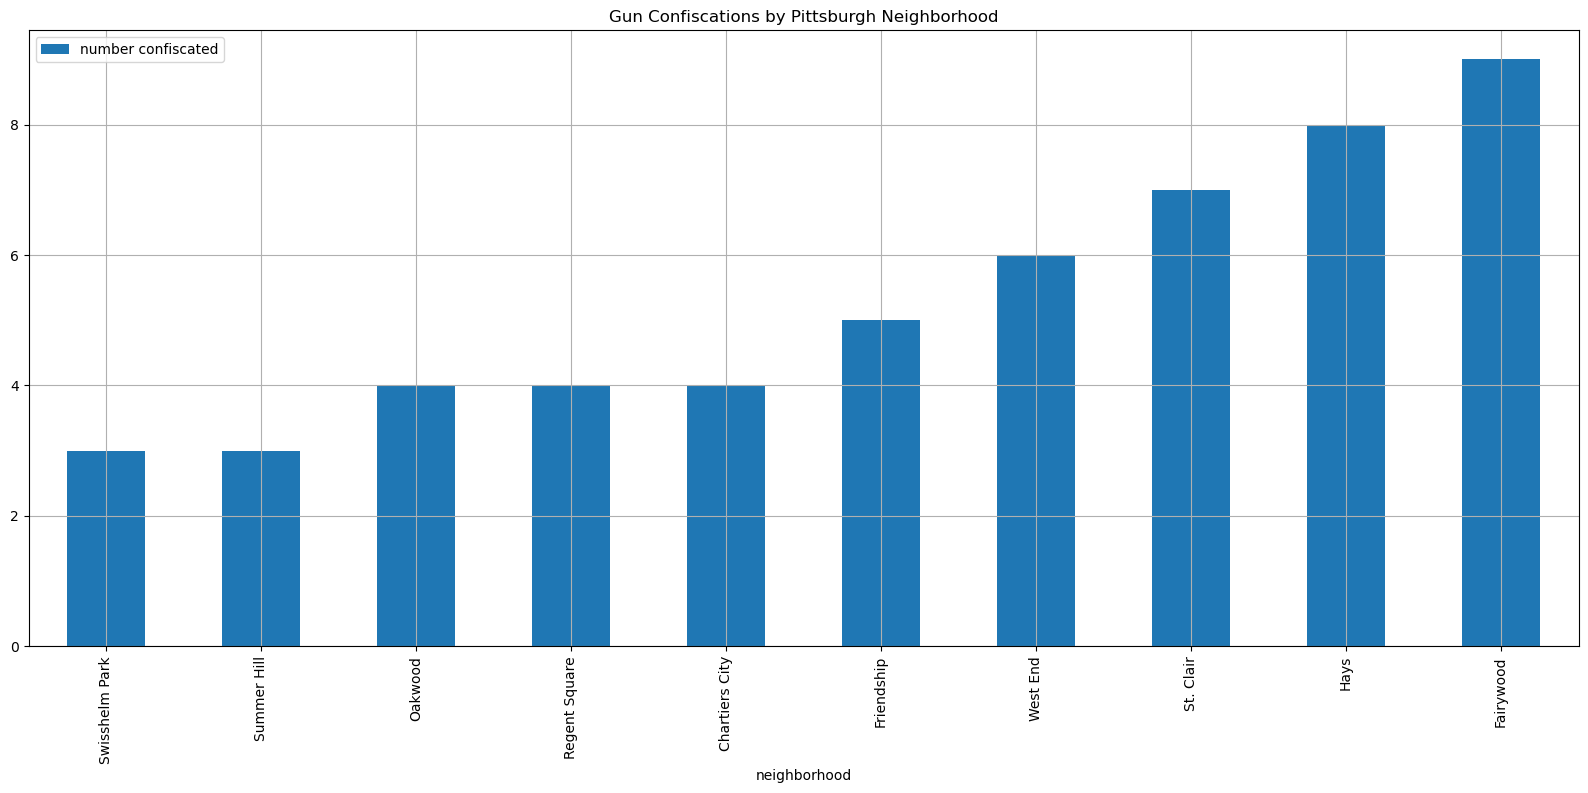

In [26]:
data.head(10).plot(x = 'neighborhood', y = 'number confiscated', kind = "bar",fontsize = 10, figsize = [20, 8], title = 'Gun Confiscations by Pittsburgh Neighborhood', grid = True)

## The Best Neighborhood

We compared the top 10 neighborhoods for all three of our metrics; we found that only one appeared in all three--Regent Square.